### In this exercise you will use again the dataset in EFIplus_medit.zip to perform some hypothesis testing

**Diogo Gomes nº26843**

### 1. Standardize, using z-score, the“Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

In [21]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [22]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [23]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

The initial mean is: 13.2620
The initial standard deviation is: 2.1723
The new mean is: -0.0000
The new initial standard deviation is: 1.0000
The 95% confidence interval is: (-0.0277, 0.0277)


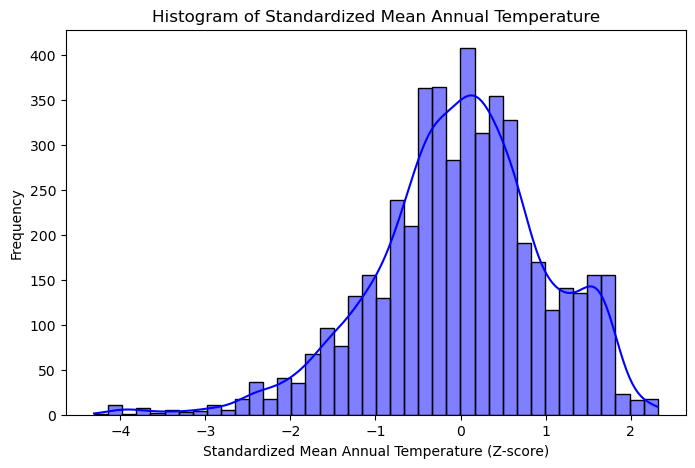

In [24]:
# mean and SD
mean_temp = df['temp_ann'].mean()
std_temp = df['temp_ann'].std()

print(f"The initial mean is: {mean_temp:.4f}")  
print(f"The initial standard deviation is: {std_temp:.4f}")

# Z-score
df['temp_ann_z'] = (df['temp_ann'] - mean_temp) / std_temp

# Ensure there are no NaN values in the relevant columns
df_clean = df.dropna(subset=['temp_ann', 'Salmo trutta fario',"temp_ann_z"])

# new mean, SD, and 95% confidence interval
new_mean = df_clean['temp_ann_z'].mean()
new_std = df_clean['temp_ann_z'].std()
ci_low, ci_high = stats.norm.interval(0.95, loc=new_mean, scale=new_std/np.sqrt(len(df)))

print(f"The new mean is: {new_mean:.4f}")  
print(f"The new initial standard deviation is: {new_std:.4f}")
print(f"The 95% confidence interval is: ({ci_low:.4f}, {ci_high:.4f})")

# plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df_clean['temp_ann_z'], bins=40, kde=True, color='blue')
plt.xlabel('Standardized Mean Annual Temperature (Z-score)')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Mean Annual Temperature')
plt.show()

### 2. Test whether the means (or medians) of“Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Use both standardized and non-standardized values and compare results. Please state which is/are the null hypothesis of your test(s).

In [26]:
# remove NaN values
df_clean = df.dropna(subset=['temp_ann', 'Salmo trutta fario'])

# split data into presence and absence
presence = df_clean[df_clean['Salmo trutta fario'] == 1]
absence = df_clean[df_clean['Salmo trutta fario'] == 0]

# non-standardized data
temp_ann_presence = presence['temp_ann']
temp_ann_absence = absence['temp_ann']

print("Mean temp_ann (presence):", temp_ann_presence.mean())
print("Mean temp_ann (absence):", temp_ann_absence.mean())

# mean and std for each group
mean_temp_presence = temp_ann_presence.mean()
std_temp_presence = temp_ann_presence.std()
mean_temp_absence = temp_ann_absence.mean()
std_temp_absence = temp_ann_absence.std()

# standardized data
temp_ann_presence_z = (temp_ann_presence - mean_temp_presence) / std_temp_presence
temp_ann_absence_z = (temp_ann_absence - mean_temp_absence) / std_temp_absence

print("Mean standardized temp_ann (presence):", temp_ann_presence_z.mean())
print("Mean standardized temp_ann (absence):", temp_ann_absence_z.mean())

# t-test for non-standardized data
t_test_p = stats.ttest_ind(temp_ann_presence, temp_ann_absence, equal_var=False)[1]
test_result_temp = f"t-test p-value: {round(t_test_p, 6)}"

# t-test for standardized data
t_test_p_z = stats.ttest_ind(temp_ann_presence_z, temp_ann_absence_z, equal_var=False)[1]
test_result_temp_z = f"t-test p-value (standardized): {round(t_test_p_z, 6)}"

print("\nResults for non-standardized data:")
print(test_result_temp)
print("\nResults for standardized data:")
print(test_result_temp_z)

Mean temp_ann (presence): 12.336994219653178
Mean temp_ann (absence): 14.693684210526316
Mean standardized temp_ann (presence): 5.701737015960002e-16
Mean standardized temp_ann (absence): 5.983517774821896e-17

Results for non-standardized data:
t-test p-value: 0.0

Results for standardized data:
t-test p-value (standardized): 1.0


- For Non-Standardized Data: We conclude that there is a significant difference in the distribution of “Mean Annual Temperature” between the presence and absence sites of Brown Trout.

- For Standardized Data: We conclude that there is no significant difference in the distribution of “Standardized Mean Annual Temperature” between the presence and absence sites of Brown Trout.

- The null hypothesis is:
H₀: There is no difference in the distributions of Mean Annual Temperature between the presence and absence sites of Salmo trutta fario (Brown Trout).

### 3. Test whether there are diferences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

In [29]:
# calculate number of samples per catchment and filter df
catchment_counts = df['Catchment_name'].value_counts().nlargest(8).index
df_filtered = df[df['Catchment_name'].isin(catchment_counts)]

# display number of samples per catchment
group_sizes = df_filtered.groupby('Catchment_name')['Elevation_mean_catch'].count().sort_values(ascending=False)
print(f"Group sizes for top 8 catchments: \n{group_sizes}")

# remove rows where 'Elevation_mean_catch' is empty
df_filtered = df_filtered.dropna(subset=['Elevation_mean_catch'])

# perform Tukey's HSD
posthoc = pairwise_tukeyhsd(df_filtered['Elevation_mean_catch'], df_filtered['Catchment_name'])
print(posthoc)

Group sizes for top 8 catchments: 
Catchment_name
Ebro            715
Galiza-Norte    709
Minho           707
Tejo            493
Cantabrica      432
Douro           396
Guadia          307
Catala          217
Name: Elevation_mean_catch, dtype: int64
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica       Catala   50.1883 0.7208  -42.1585  142.5351  False
  Cantabrica        Douro  268.1584    0.0  190.9443  345.3726   True
  Cantabrica         Ebro  467.4299    0.0   399.797  535.0628   True
  Cantabrica Galiza-Norte -184.2794    0.0   -252.02 -116.5388   True
  Cantabrica       Guadia -168.8947    0.0 -251.7428  -86.0466   True
  Cantabrica        Minho  290.9895    0.0  223.2126  358.7663   True
  Cantabrica         Tejo  168.3227    0.0    95.179  241.4664   True
      Catala        Douro  217.9701    0.0  124.2

- The null hypothesis (H0) states that there is no significant differences in the mean elevation between the upstream catchement between the two catchment sites.

### 4. Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?
The fact that the data is not normally distributed and we're assuming that it is. In this case it would be better if we perhaps used a Mann-Whitney test instead of a t-test.